In [1]:
import numpy as np
import matplotlib.pyplot as plt


Tenemos el siguiente caso, piedras magicas tienen un radio de actuación donde se sincronizan cuando tienen cierto volumen, entonces aqui calculamos el tamaño asumiendo ese volumen en un cubo (muy facil relacionar el L al V) y la distancia de sincronización.

Esto es para un libro de ficción sobre magia y ayuda a visualizar las cosas asi como darles consistencia, los datos se anotaran:

In [2]:
# quiero saber como adebe de actuar la piedra a 100cm, y más
Largo_cm = np.array([0, 5, 10, 20, 30]) 
Distancia_actuacion_km = np.array([0, 0.001, 0.1, 1, 10])

P = np.polyfit(Largo_cm, Distancia_actuacion_km, 8)

print(P)
print("--\n")
z = np.poly1d(P) # lo covierte en un polynomio
print(z)
print("--\n")
print(z(0.1))

[ 5.77609905e-12  1.37616871e-10  2.66027827e-09  2.57240139e-08
 -6.83276749e-07 -1.82697573e-05  2.21528911e-03 -1.03612844e-02
 -3.97205465e-16]
--

           8             7            6             5             4
5.776e-12 x + 1.376e-10 x + 2.66e-09 x + 2.572e-08 x - 6.833e-07 x
              3            2
 - 1.827e-05 x + 0.002215 x - 0.01036 x - 3.972e-16
--

-0.0010139938867418919


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


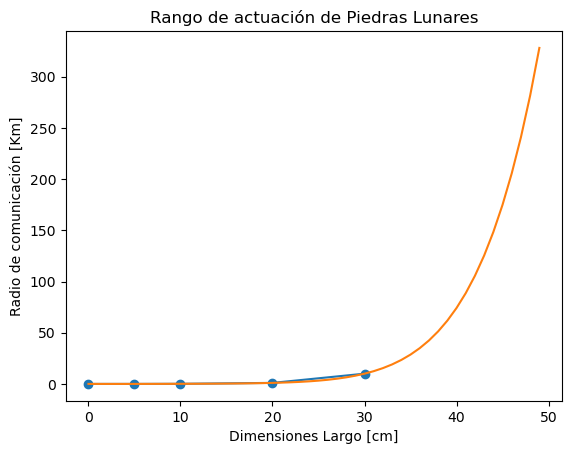

In [5]:
%matplotlib inline

x = Largo_cm
y = Distancia_actuacion_km

x_extended = np.arange(0, 50)


plt.title("Rango de actuación de Piedras Lunares")
plt.xlabel("Dimensiones Largo [cm]")
plt.ylabel("Radio de comunicación [Km]")
plt.scatter(x, y)
plt.plot(x, z(x))
plt.plot(x_extended, z(x_extended))
plt.show()
# en general este grafico no se quiere, pero yo quiero tener ese comportamietno semi exponencial

In [ ]:
distancias_prueba_cm = [10**i for i in range(0, 3)] + [ 10**3 + 100*i for i in range(1,6)]  
distancias_m = list( map(lambda x: x * 100, distancias_prueba_cm) ) # convertimos a metros

print("distancia [m]", "\t","actuación [km]")
for d in distancias_m:
    print(f"{d:.0f}", "\t \t", f"{z(d):.2e}")

distancia [m] 	 actuación [km]
100 	 	 7.44e+04
1000 	 	 5.92e+12
10000 	 	 5.79e+20
110000 	 	 1.24e+29
120000 	 	 2.48e+29
130000 	 	 4.71e+29
140000 	 	 8.53e+29
150000 	 	 1.48e+30


### polyfit warning
es algo cuando tenemos demasiadas oscilaciones y puede ser un sobre fitting.

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: 

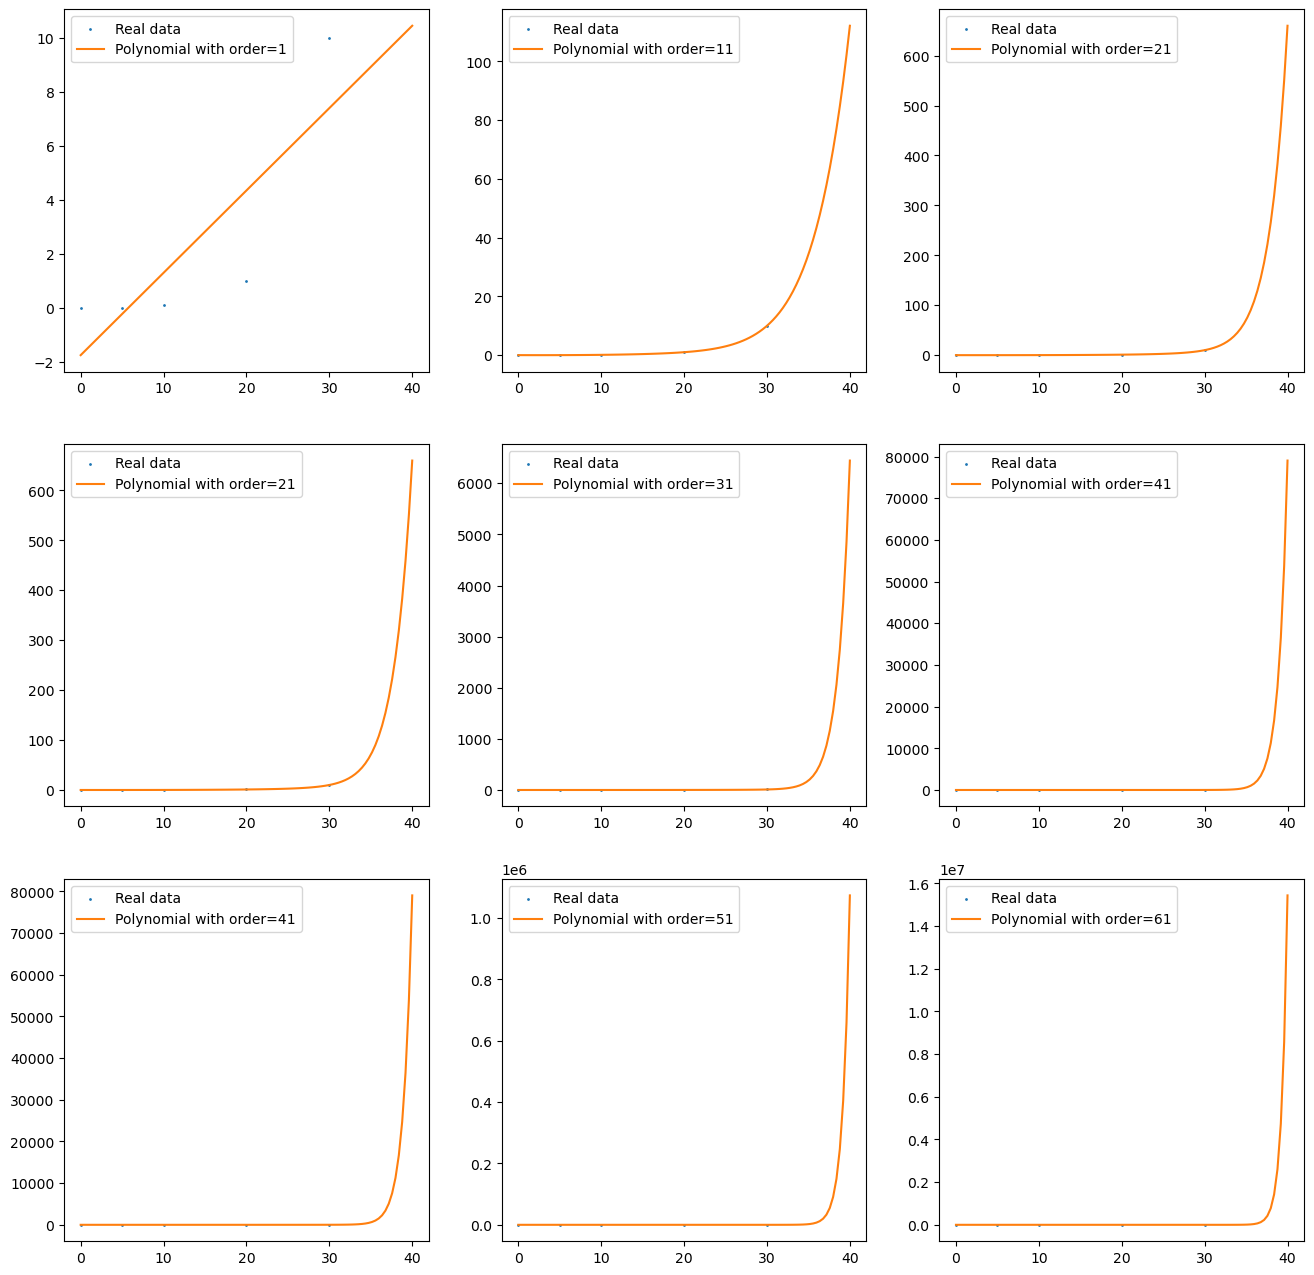

In [ ]:
x= Largo_cm 
y = Distancia_actuacion_km

x_continous = np.linspace(0, 40, 100)

fig,ax = plt.subplots(3,3,figsize = (16,16))
for n in range(3):
    for k in range(3):
        order = 20*n+10*k+1

        z = np.polyfit(x,y,order)
        p = np.poly1d(z)

        ax[n,k].scatter(x,y,label = "Real data",s=1)
        ax[n,k].plot(x_continous, p(x_continous),label = "Polynomial with order={}".format(order), color='C1')
        ax[n,k].legend()
plt.show()

# Alternativas de Fitting

In [ ]:
from numpy.polynomial import Polynomial as P

order = 3
p = P.fit(x, y, order)


In [ ]:
P(x)

Polynomial([ 0.,  5., 10., 20., 30.], domain=[-1,  1], window=[-1,  1])

In [ ]:
P?

Init signature: P(coef, domain=None, window=None)
Docstring:     
A power series class.

The Polynomial class provides the standard Python numerical methods
'+', '-', '*', '//', '%', 'divmod', '**', and '()' as well as the
attributes and methods listed in the `ABCPolyBase` documentation.

Parameters
----------
coef : array_like
    Polynomial coefficients in order of increasing degree, i.e.,
    ``(1, 2, 3)`` give ``1 + 2*x + 3*x**2``.
domain : (2,) array_like, optional
    Domain to use. The interval ``[domain[0], domain[1]]`` is mapped
    to the interval ``[window[0], window[1]]`` by shifting and scaling.
    The default value is [-1, 1].
window : (2,) array_like, optional
    Window, see `domain` for its use. The default value is [-1, 1].

    .. versionadded:: 1.6.0
File:           c:\programdata\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py
Type:           ABCMeta
Subclasses:     
